# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [3]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [4]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [5]:
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento

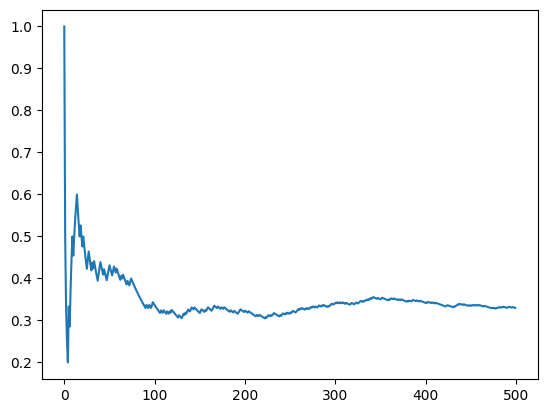

In [6]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [7]:
print(np.mean(X), np.std(X))

0.34812448087535086 0.05190190393034875


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [9]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)     #Cuando la convergencia de los resultados está asegurada, se repite n veces
        lista.append(np.mean(s))    #Se guarda la media de los resultados del experimento
    return lista

In [21]:
Y=modelo(250)         #Esta función, repite el experimento (de 500 iteraciones) 120 veces,
                      #Al saber que los resultados convergen , la cantidad de corridas no debe ser muy grande
                      #con el fin de mantener el costo computacional bajo

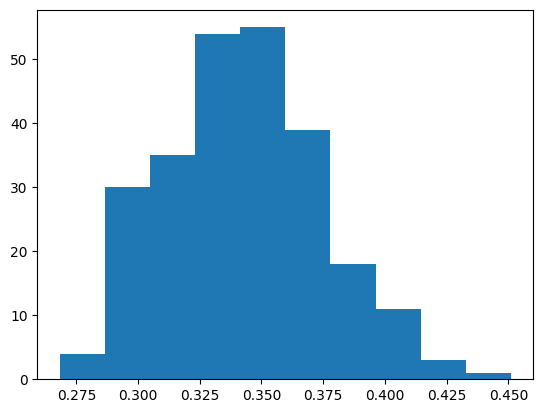

In [22]:
plt.hist(Y)           #El histograma revela que las variables tiene una distribución semejante a la chi-cuadrada
plt.show()

In [23]:
print(np.mean(Y), np.std(Y))    #Se calculan los parametros: media y varianza

0.34342056298409884 0.03217316811881996


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

El intervalo de confianza se construye utilizando el Teorema Central del Límite, es decir, que para muestras de tamaño $n>33$ , su distribución se aproxima a $N(0,1)$ .

Al tratarse un intervalod de confianza, se utiliza el estadístico $Z_{\alpha/2}$.

El error estandar de la media es $\frac{s}{\sqrt{n}}$

Finalmente, el es intervalo se calcula con la expresión $\bar{x} \pm Z_{\alpha/2} \times \frac{s}{\sqrt{n}}$


In [ ]:
np.mean(Y)

In [ ]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)    #Ya que  se trabaja con una confianza del 95% Z_{0.05/2}=1.96

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

Para obtener dicha ecuación, se despeja $n$ del margen de error:

\begin{align*}
  \epsilon &= 2\; Z_{\alpha/2} \; \frac{\sigma}{\sqrt{N}}\\
  \frac{\sqrt{N}}{\sigma}&=\frac{2 \; Z_{\alpha /2} }{\epsilon}\\
  N&=\Bigg( \frac{2\;\sigma \; Z_{\alpha /2} }{\epsilon} \Bigg)^2
\end{align*}

In [30]:
N = (2*np.std(X)*1.96/0.01)**2

In [31]:
print(N)   #Indica el número de solucione snecesarias para que los resultados del experimento converjan

413.94125590143733


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

***Teorema Fundamental de las Dsitribuciones Normales***

> "Cualquier combinación lineal de variables aleatorias e independientes normales, también sera normal, con media igual a la combinación lineal de las medias originales, y varianza igual a la combinación lineal del cuadrado de las varianzas originales y de sus coeficientes "

En otras palabras, si  $X=a_1x_1+a_2x_2+...+a_nx_n$ con $x_i \sim N(\mu_i, \sigma_i)$  entonces
$$E[X]=\sum_{i=1}^na_i \mu_i$$
$$VAR[X]=sum_{i=1}n (a_i)^2 \sigma_i^2$$
Finalmente $$X \sim N\Big(\sum_{i=1}^na_i \mu_i\;\;, \; \sqrt{\sum_{i=1}n (a_i)^2 \sigma_i^2}\;\Big)$$



In [ ]:
norm.cdf(-0.04, -0.02, 0.05)

In [32]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)   #El signo - es debido a que se trabaja con la muestra x2-x1

0.001157695405576975